<a href="https://colab.research.google.com/github/crislanecas/python/blob/main/Alura%26WoMakersCode/15_Resumo_regress%C3%A3o_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das bibliotecas

In [7]:
# Importa as bibliotecas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [8]:
# Importar ferramentas da biblioteca scikit-learn.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Bibliotecas opcionais

In [9]:
# # Importa a biblioteca.
# import warnings
# # Para alterar os avisos que aparecem antes de plotar os gráficos.
# warnings.filterwarnings('ignore') # Nunca exibe.
# warnings.filterwarnings(action ='once') # Mostra uma única vez.

# Importação dos dados

In [10]:
# Importa parte da biblioteca do Google Colab para te acesso ao Google Drive, utilizando o método drive.mount().
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Cria um dataframe para receber os dados do arquivo com o conteúdo separado por delimitadores.
dados = pd.read_table('/content/drive/MyDrive/Colab Notebooks/Bootcamp Data Analytics - WoMakersCode/Estatística - Alura/00. Dados/consumo_cerveja.csv', sep=';')

# Configurações de estilo e cor da biblioteca seaborn

In [12]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Accent")

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

# Visão geral dos dados

In [13]:
# Mostrar o número de linhas e colunas do dataframe.
dados.shape

(365, 7)

In [14]:
# Mostra um resumo do dataframe, com os 5 primeiros e últimos registros e total de linhas e colunas.
dados

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


In [15]:
# Mostra uma tabela descritiva com os dados estatísticos.
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


In [16]:
# Cria uma matriz com o calculos da correlação entre as variáveis.
dados.corr().round(4)

<ipython-input-16-4bc7ebdb3955>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados.corr().round(4)


,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


# Análises gráficas

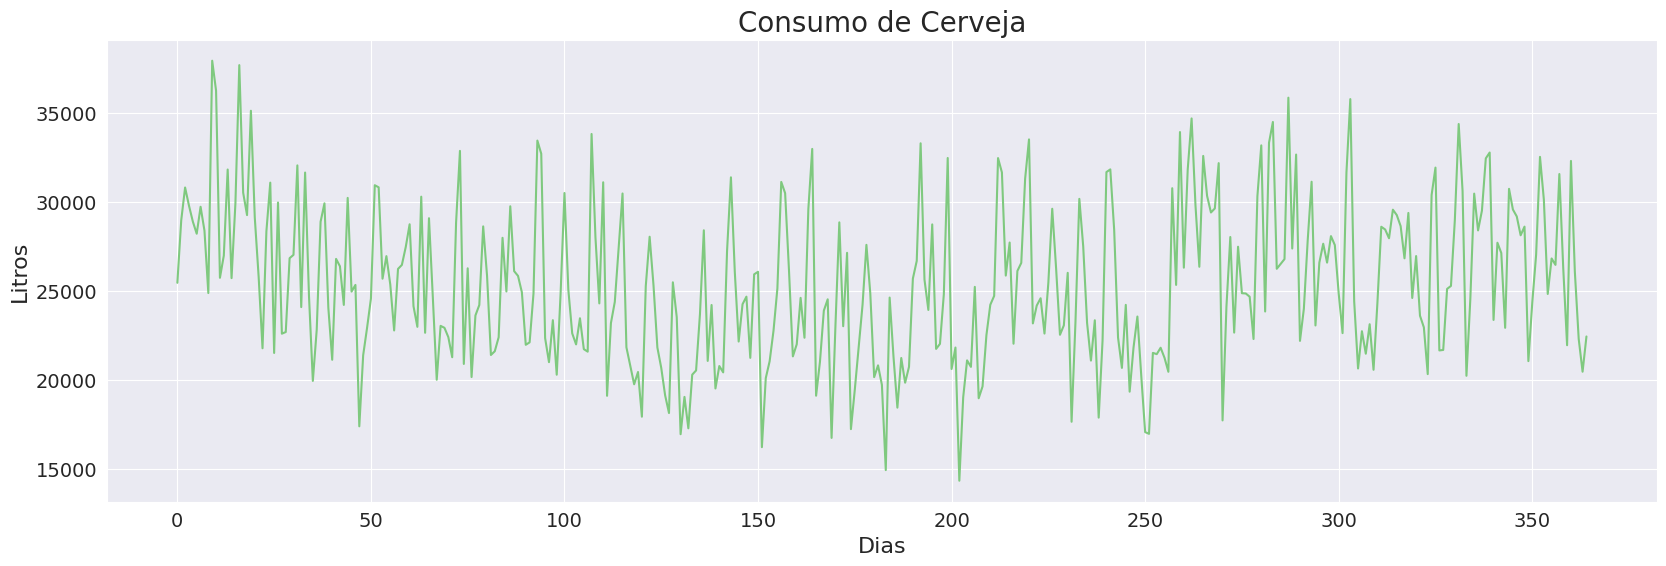

In [17]:
# Cria uma gráfico para mostrar o comportamento da variável dependente (consumo de cerveja) ao longo do ano.
fig, ax = plt.subplots(figsize=(20, 6))
# Insere títulos e ajusta o tamanho da fonte.
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = dados['consumo'].plot(fontsize=14)

<Axes: title={'center': 'Consumo de Cerveja'}, ylabel='Litros'>

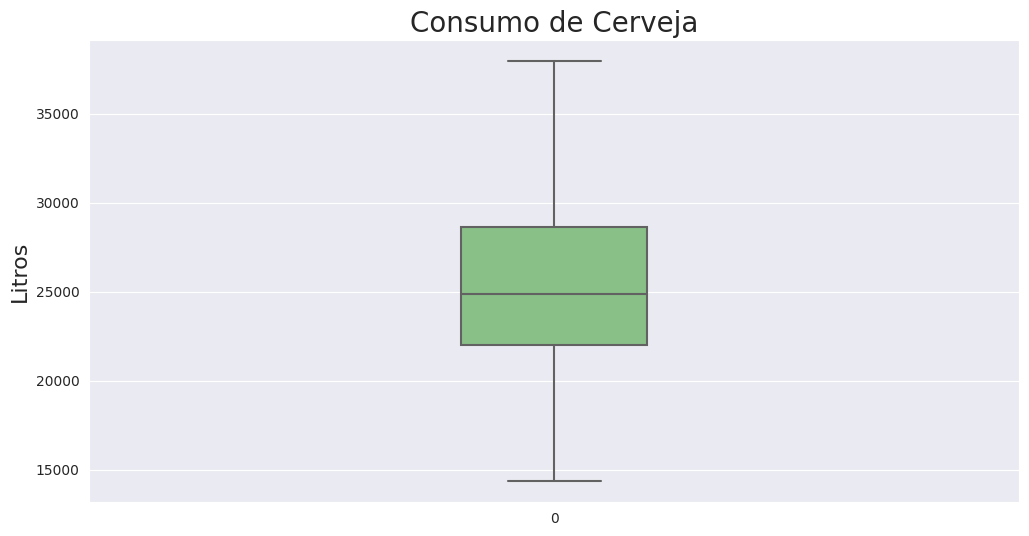

In [18]:
# Cria um gráfico box plot com os dados de consumo de cerveja.
ax = sns.boxplot(data=dados['consumo'], orient='v', width=0.2)
# Formata tamanho do gráfico e insere títulos e ajusta o tamanho da fonte.
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax

<Axes: title={'center': 'Consumo de Cerveja'}, xlabel='Final de Semana', ylabel='Litros'>

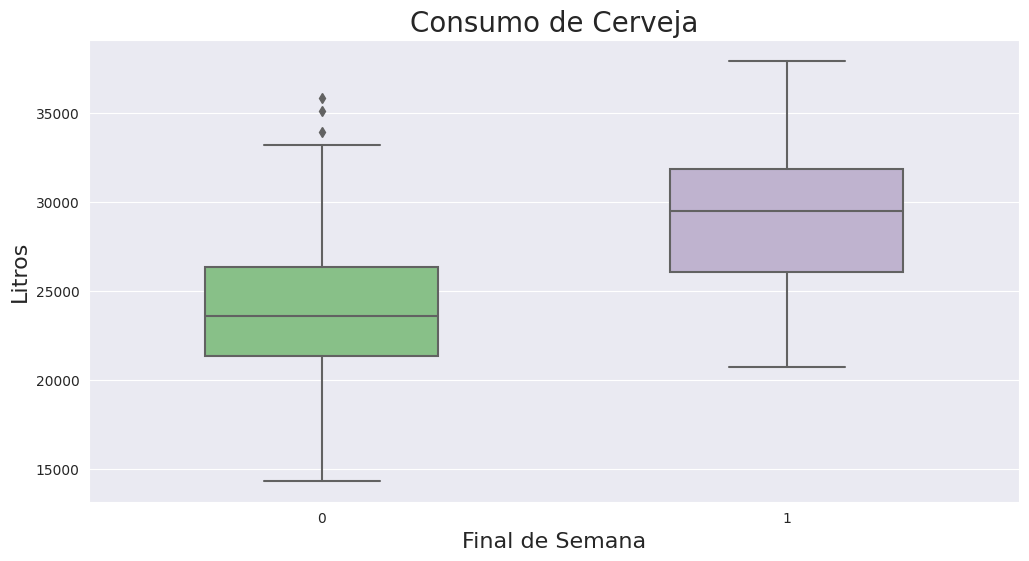

In [19]:
# Cria um gráfico box plot com os dados de consumo de cerveja e final de semana (fds).
ax = sns.boxplot(y='consumo', x='fds', data=dados, orient='v', width=0.5)
# Formata tamanho do gráfico e insere títulos e ajusta o tamanho da fonte.
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax

<Axes: title={'center': 'Consumo de Cerveja'}, xlabel='Final de Semana', ylabel='Litros'>

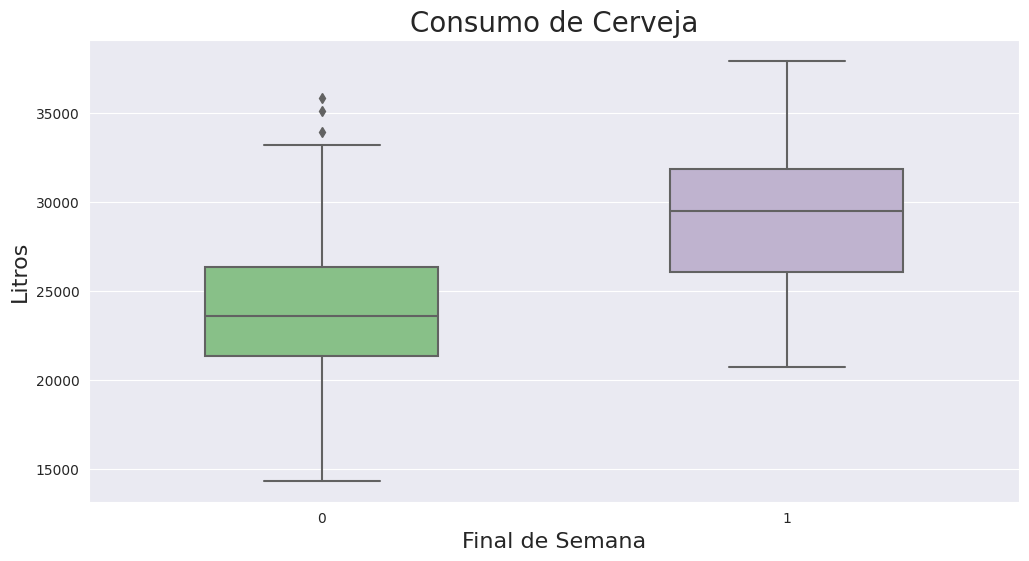

In [20]:
# Cria um gráfico box plot com os dados de consumo de cerveja e final de semana (fds).
ax = sns.boxplot(y='consumo', x='fds', data=dados, orient='v', width=0.5)
# Formata tamanho do gráfico e insere títulos e ajusta o tamanho da fonte.
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax

<Axes: title={'center': 'Distrubuição de Frequências'}, xlabel='consumo', ylabel='Consumo de Cerveja(Litros)'>

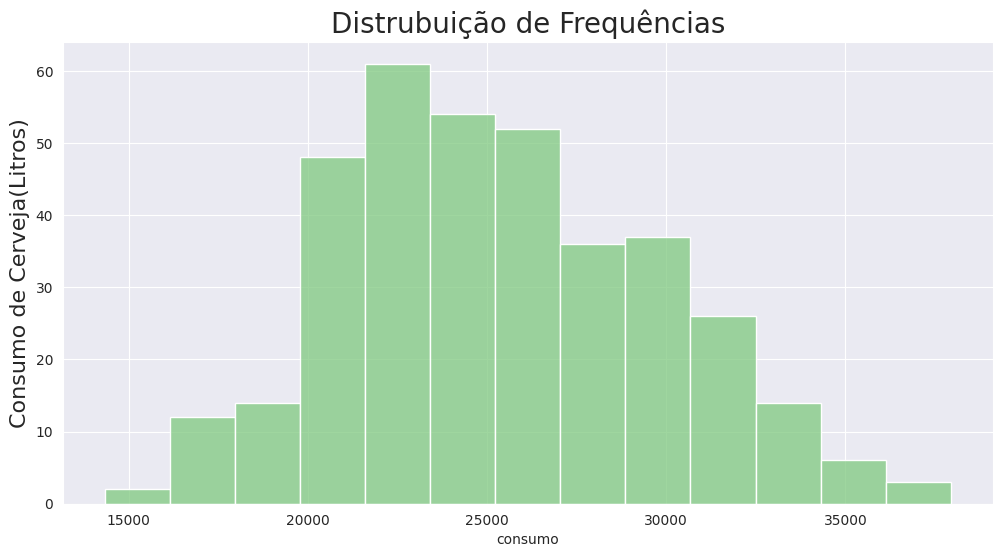

In [21]:
# Cria um gráfico de distribuição com a variável consumo.
ax = sns.histplot(dados['consumo'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distrubuição de Frequências', fontsize=20)
ax.set_ylabel('Consumo de Cerveja(Litros)', fontsize=16)
ax

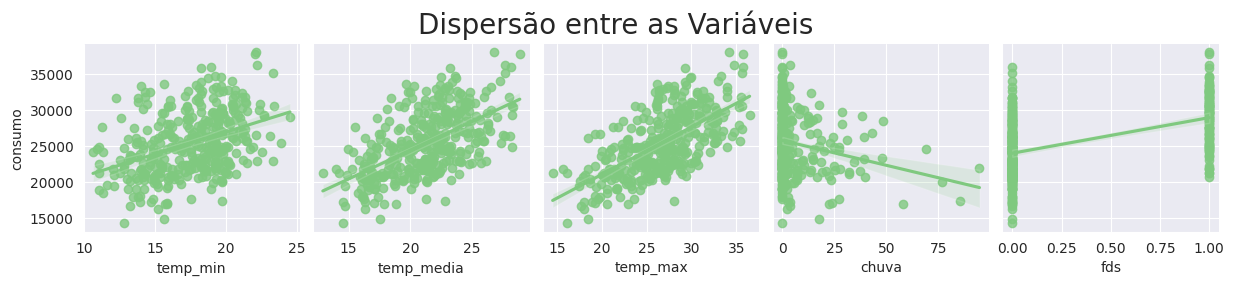

In [22]:
# Cria um gráfico de dispersão com a variável consumo e as outras variáveis do dataframe, incluindo um reta regressão.
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'], kind = 'reg')
# Insere títulos e ajusta o tamanho da fonte e posição.
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.1)
ax

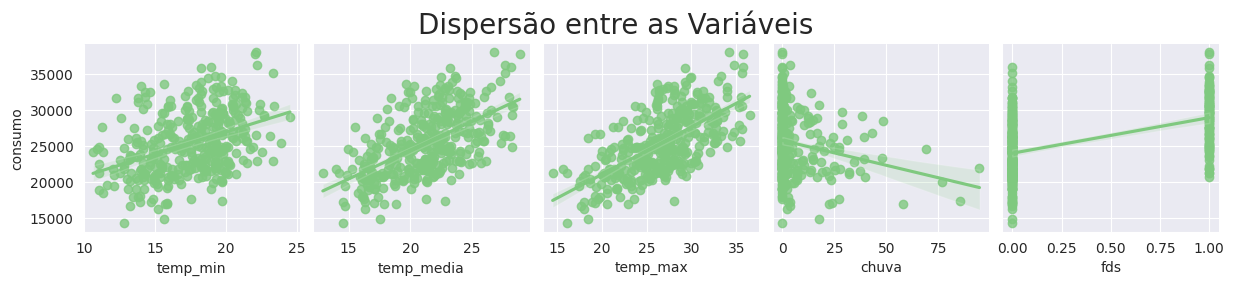

In [23]:
# Cria um gráfico de dispersão com a variável consumo e as outras variáveis do dataframe, incluindo um reta regressão.
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'], kind = 'reg')
# Insere títulos e ajusta o tamanho da fonte e posição.
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.1)
ax

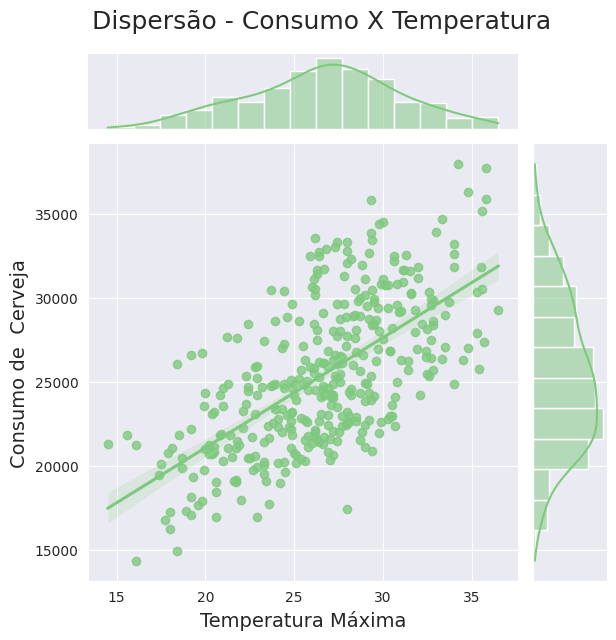

In [24]:
# Cria um gráfico de dispersão com a distribuição de frequência de cada variável, adicionando a linha de regressão.
ax = sns.jointplot(x="temp_max", y="consumo", data=dados, kind='reg')
ax.fig.suptitle('Dispersão - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de  Cerveja", fontsize=14)
ax

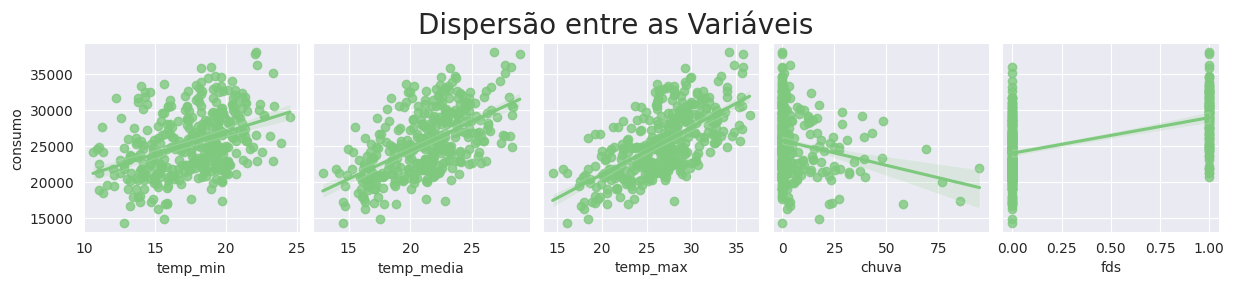

In [25]:
# Cria um gráfico de dispersão com a variável consumo e as outras variáveis do dataframe, incluindo um reta regressão.
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'], kind = 'reg')
# Insere títulos e ajusta o tamanho da fonte e posição.
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.1)
ax

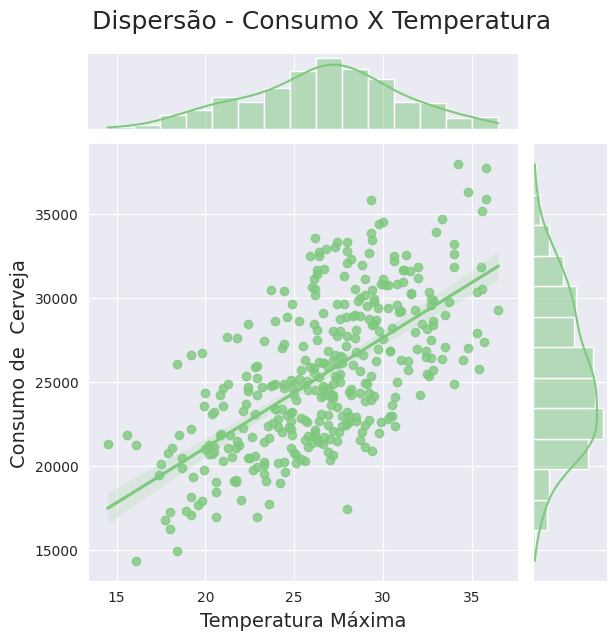

In [26]:
# Cria um gráfico de dispersão com a distribuição de frequência de cada variável, adicionando a linha de regressão.
ax = sns.jointplot(x="temp_max", y="consumo", data=dados, kind='reg')
ax.fig.suptitle('Dispersão - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de  Cerveja", fontsize=14)
ax

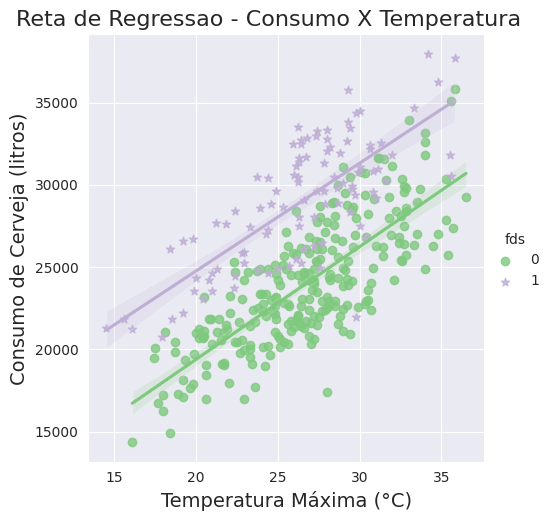

In [27]:
# Cria uma gráfico de dispersão com a reta de regressão, com marcadores diferentes.
ax = sns.lmplot(x="temp_max", y="consumo", data=dados, hue="fds", markers=['o','*'])
ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax

# Regressão linear

In [28]:
# Cria uma series com a variável dependente.
y = dados['consumo']

In [29]:
# Cria um dataframe com as variáveis explicativas.
X = dados[['temp_max', 'chuva', 'fds']]

In [30]:
# Utiliza a função train_test_split para retornar uma lista de quatro itens que serão criados com os elementos da listas acimas com as variáveis do dataframe.
# O parâmetro test_size informa que 30% serão selecionados de forma aleatória para a realização de testes do modelo, e o restante será para treino (70%).
# O parâmetro random_state=2811, permite ter um conjunto de treino e de teste idênticos para esse exercício.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [31]:
# Utiliza a função LinearRegression() para instanciando o modelo.
modelo = LinearRegression()

In [32]:
# Utiliza o método fit() para estimar o modelo com dados passados como parâmetro.
modelo.fit(X_train, y_train)

LinearRegression()

## Coeficiente de determinação (R²)

In [33]:
# Calcula o coeficiente de determinação com os dados de traino, utilizando o método score().
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.73


## Gerando previsões

In [34]:
# Cria uma previsão utilizando o método predict().
y_previsto = modelo.predict(X_test)

## Coeficiente de determinação (R²) para as previsões do modelo

In [35]:
# Calcula o coeficiente de determinação com os dados previstos, utilizando o método score().
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.69


## Previsões Pontuais

### Dados de entrada

In [36]:
# Selecional o primeiro registro do dataframe criado para teste.
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


### Gerando previsão pontual

In [37]:
# Gera uma previsão do consumo médio estimado de cerveja, utilizando o modelo.
modelo.predict(entrada)[0]

26094.901775262017

### Simulador simples

In [38]:
# Simula o consumo com base no modelo de previsão.
temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

26094.90 litros


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Calculando o intercepto do modelo

In [39]:
# Calcula o intercepto do modelo, considerando as variáveis explicativas igual a 0.
modelo.intercept_

5951.976339312445

## Calculando coeficientes de regressão

In [40]:
# Calcula o coeficiente de regressão, que mede a variação no valor médio da variável dependente com relação a variação de apenas uma variável explicativa.
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [41]:
# Cria uma lista com os nomes das variáveis para ser usada como index.
index = ['Intercepto', 'Temperatura Máxima', 'Chuva (mm)', 'Final de Semana']

In [42]:
# Cria um dataframe com os dados de intercepto e coeficiente de regressão.
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,5951.976339
Temperatura Máxima,684.736759
Chuva (mm),-60.782435
Final de Semana,5401.083339


## Interpretação dos coeficientes estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>

# Análises gráficas das previsões do modelo

In [43]:
# Gera previsões do modelo para os dados de treino.
y_previsto_train = modelo.predict(X_train)

<Axes: title={'center': 'Previsão X Real'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Consumo de Cerveja (litros) - Real'>

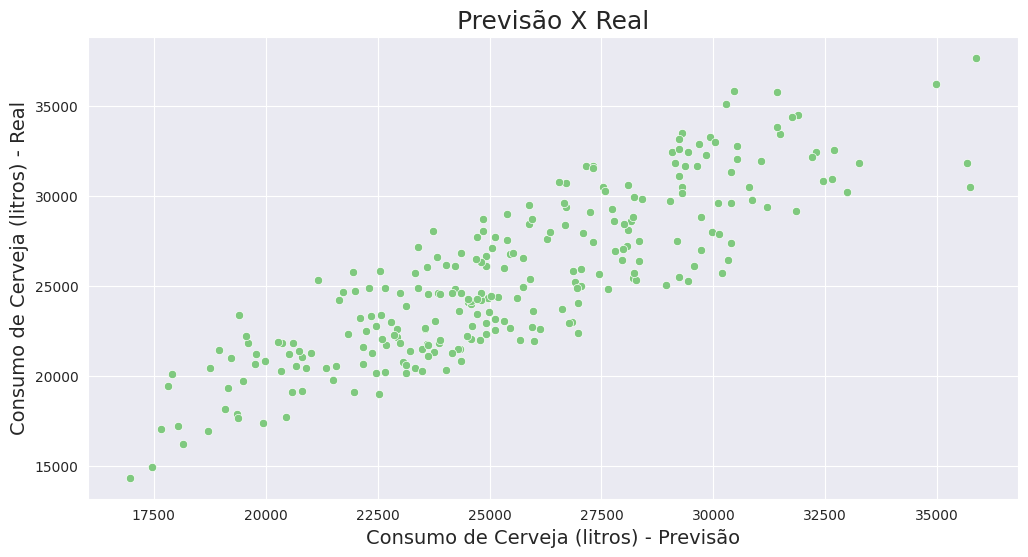

In [44]:
# Cria um gráfico de dispersão entre o valor estimado e o valor real.
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize=14)
ax

## Calculando os resíduos

In [45]:
# Calculando o resíduo para os dados de treino.
residuo = y_train - y_previsto_train

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Resíduos'>

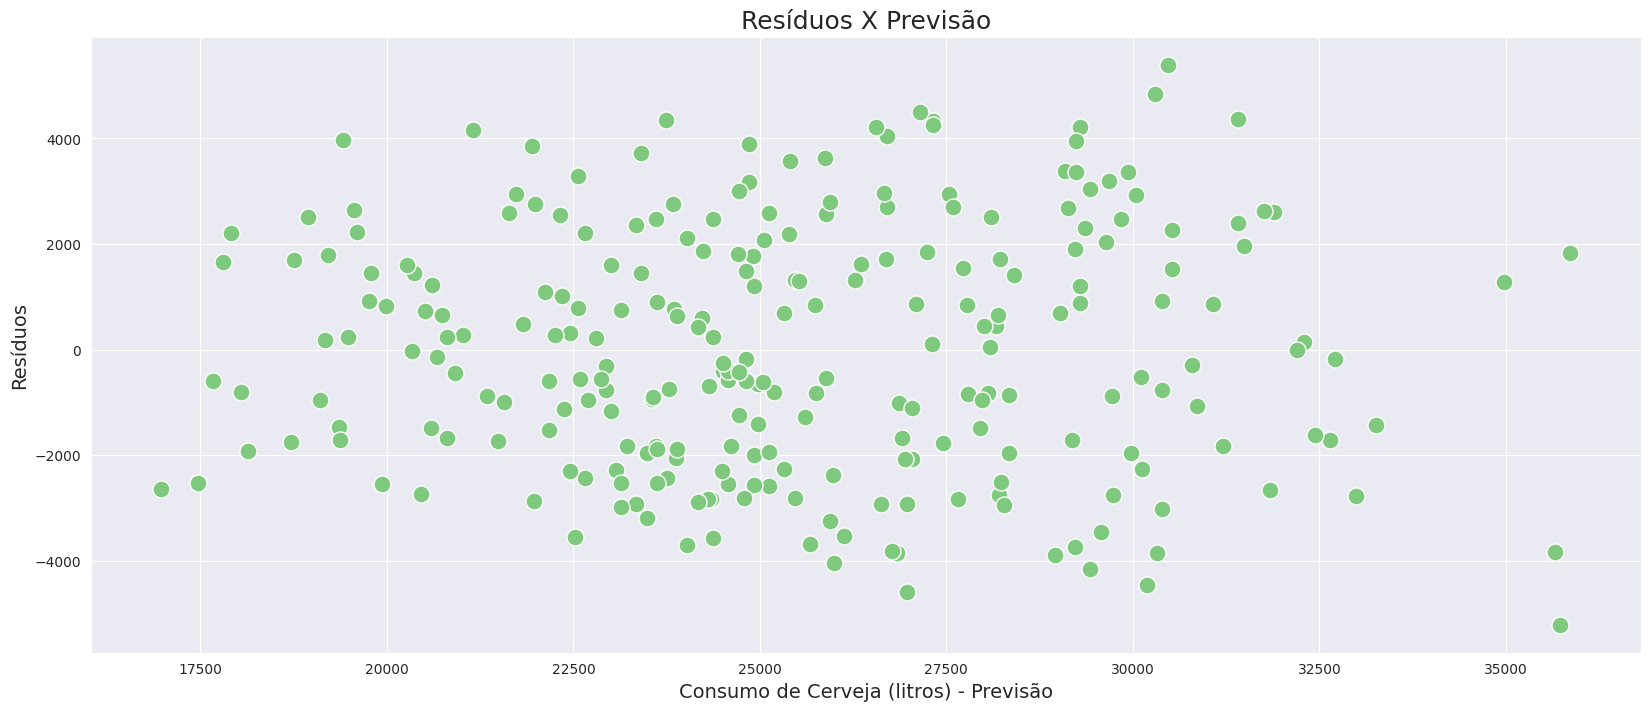

In [46]:
# Cria uma gráfico de dispersão entre o valor estimado e o resíduo calculado acima.
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Resíduos²'>

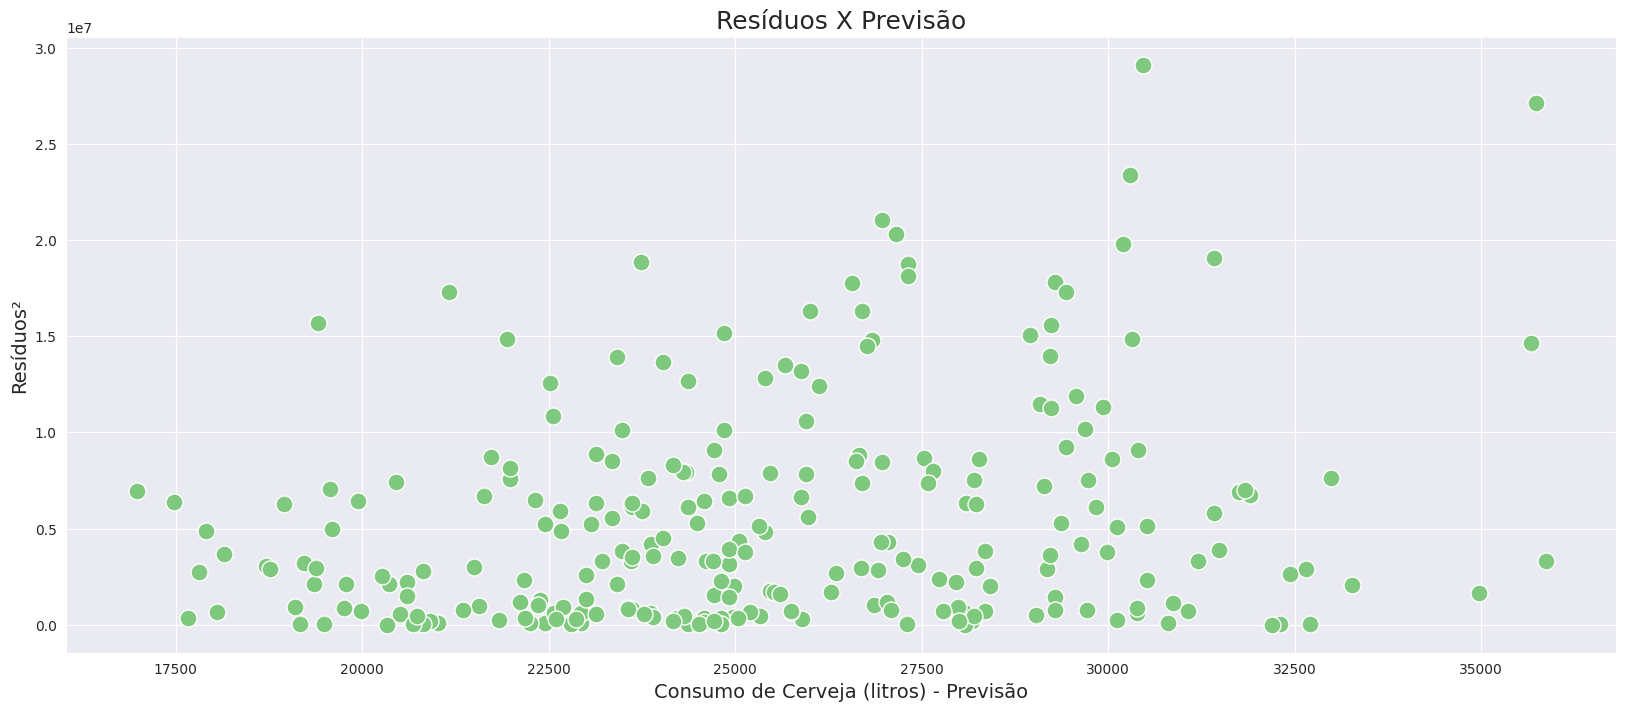

In [47]:
# Cria uma gráfico de dispersão entre o valor estimado e o resíduo elevados ao quadrado (²).
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax

<Axes: title={'center': 'Distribuição de Frequências dos Resíduos'}, xlabel='Litros', ylabel='Count'>

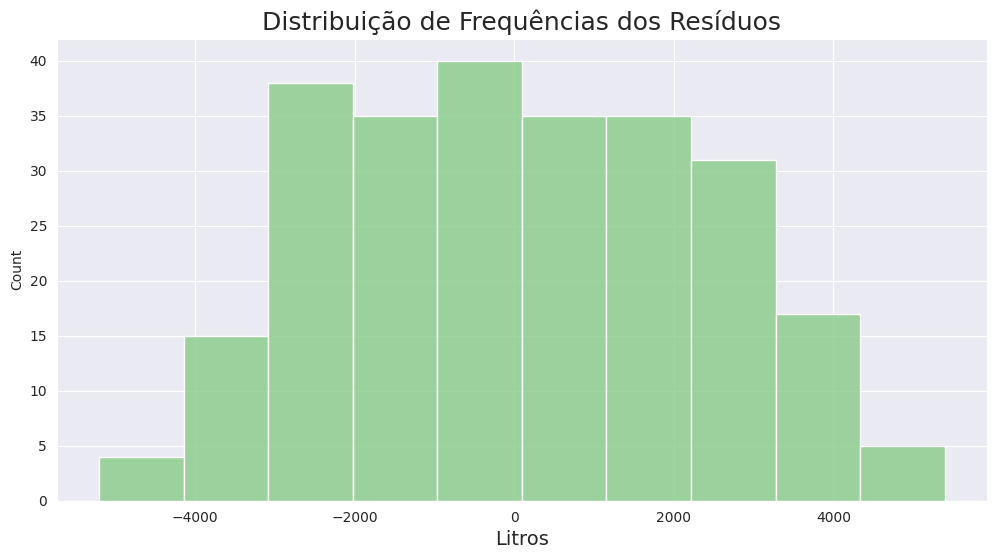

In [48]:
# Cria um gráfico de distribuição de frequência ou histograma com dados de resíduos.
ax = sns.histplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax

# Comparando modelos

In [49]:
# Cria uma series com a variável dependente.
y = dados['consumo']

## Modelo com temperatura máxima

In [50]:
# Cria um dataframe com as variáveis explicativas.
X = dados[['temp_max', 'chuva', 'fds']]

In [51]:
# Utiliza a função train_test_split para retornar uma lista de quatro itens que serão criados com os elementos da listas acimas com as variáveis do dataframe.
# O parâmetro test_size informa que 30% serão selecionados de forma aleatória para a realização de testes do modelo, e o restante será para treino (70%).
# O parâmetro random_state=2811, permite ter um conjunto de treino e de teste idênticos para esse exercício.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [52]:
# Utiliza a função LinearRegression() para instanciando o modelo.
modelo = LinearRegression()

In [53]:
# Utiliza o método fit() para estimar o modelo com dados passados como parâmetro.
modelo.fit(X_train, y_train)

LinearRegression()

In [54]:
# Cria uma previsão utilizando o método predict().
y_previsto = modelo.predict(X_test)

## Modelo com temperatura média

In [55]:
# Cria uma novo dataframe com as variáveis explicativa.
X2 = dados[['temp_media', 'chuva', 'fds']]

In [56]:
# Utiliza a função train_test_split para retornar uma lista de quatro itens que serão criados com os dados do dataframe acima.
# O y2 será igual ao y, pois estamos usando o parâmetro random_state=2811.
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

In [57]:
# Utiliza a função LinearRegression() para instanciando o novo modelo.
modelo_2 = LinearRegression()

In [58]:
# Utiliza o método fit() para estimar o novo modelo com dados passados como parâmetro.
modelo_2.fit(X2_train, y2_train)

LinearRegression()

In [63]:
# Cria uma previsão utilizando o método predict().
y_previsto_2 = modelo_2.predict(X2_test)

## Calculando as métricas dos dois modelos

In [64]:
# Calcula o erro quadrático médio, raíz do erro quadrático médio e R² do primeiro modelo.
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

# Cria um dataframe com as métricas calculadas acima.
pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,5471976.38
REQM,2339.23
R²,0.69


In [65]:
# Calcula o erro quadrático médio, raíz do erro quadrático médio e R² do novo modelo.
EQM_2 = metrics.mean_squared_error(y2_test, y_previsto_2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto_2)).round(2)
R2_2 = metrics.r2_score(y2_test, y_previsto_2).round(2)

# Cria um dataframe com as métricas calculadas acima.
pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,6060775.46
REQM,2461.86
R²,0.66
